##   <center> <span style="color:#f6f794"> Reading the new clean data from github url to check if everything went ok </span> </center>

In [1]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from geopy.geocoders import Nominatim
import time
from geopy.extra.rate_limiter import RateLimiter
import csv
import re

In [2]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature/eda-cleaning/data/airbnb_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(
                f,
                sep=',',                  # Specify the delimiter
                encoding='utf-8',         # Specify the encoding
                quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )

        print(f"✅ Data downloaded succesfully!")
        
        return df

    except requests.exceptions.RequestException as req_err:
        print(f"❌ Network/Request Error while downloading data: {req_err}")
        return None
    except Exception as e:
        print(f"❌ General Error while processing data: {e}")
        return None

# Creating dataframe from GitHub URL
df_clean_1 = load_airbnb_data_from_github(GITHUB_CLEAN_URL)


🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


_____
##   <center> <span style="color:#f6f794"> Checking the data </span> </center>

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hosts_per_city.index, y=hosts_per_city.values, palette=['#ff5a5f'])
C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:8: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hosts_per_city.index, y=hosts_per_city.values, palette=['#ff5a5f'])


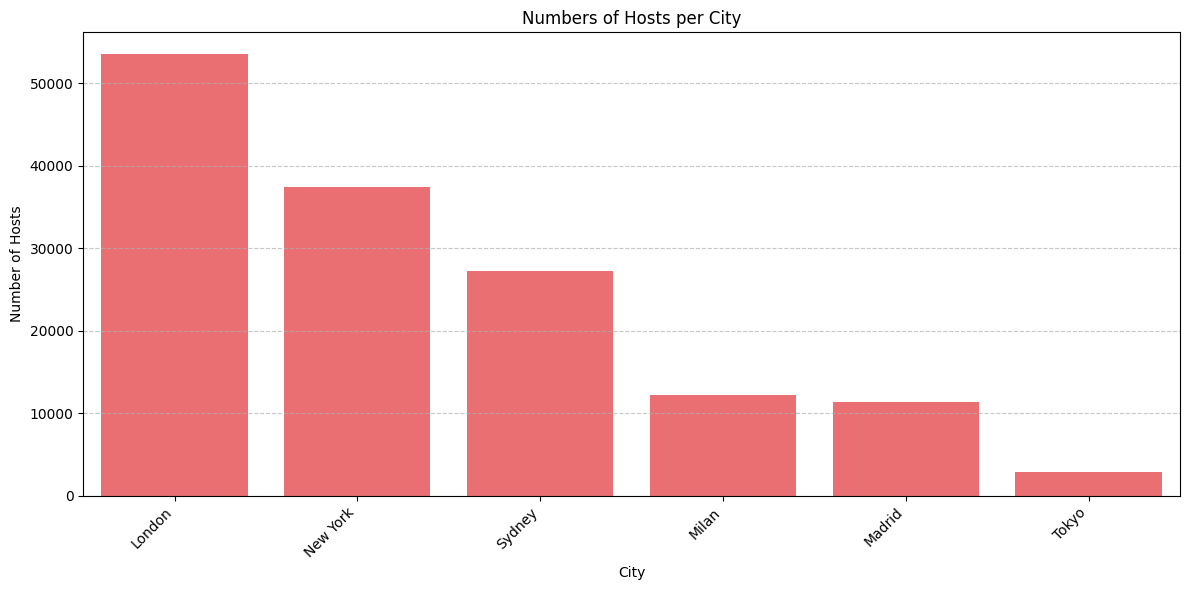

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recurrent_hosts_per_city.index, y=recurrent_hosts_per_city.values, palette=['#ff5a5f'])
C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:23: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=recurrent_hosts_per_city.index, y=recurrent_hosts_per_city.values, palette=['#ff5a5f'])


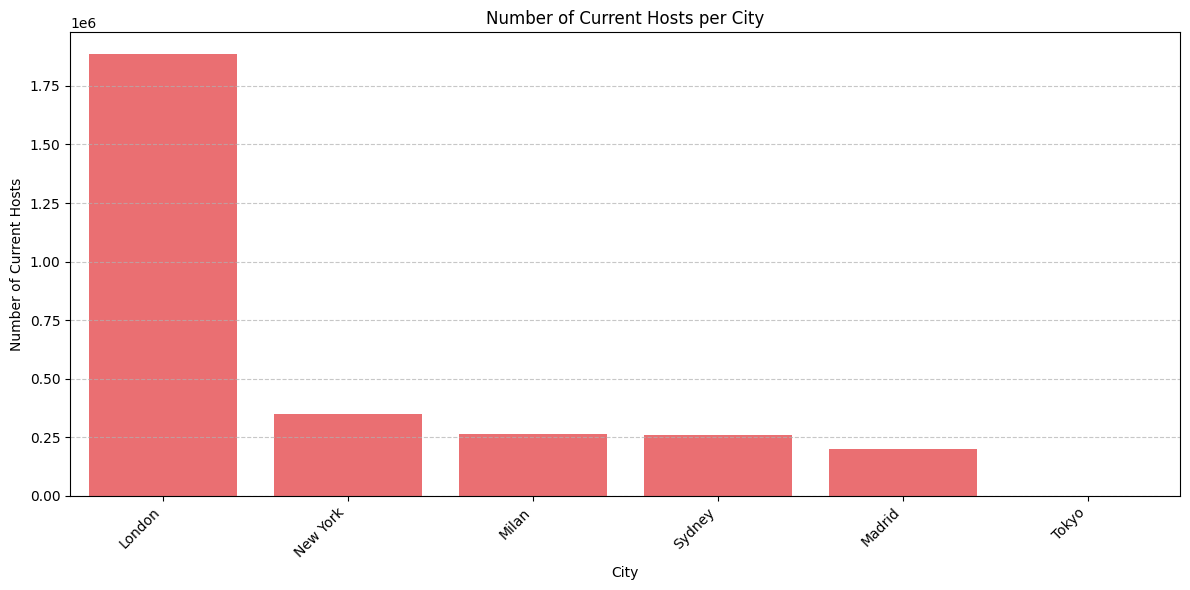

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette=['#ff5a5f', '#00a699', 'lightgray'])
C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:37: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette=['#ff5a5f', '#00a699', 'lightgray'])


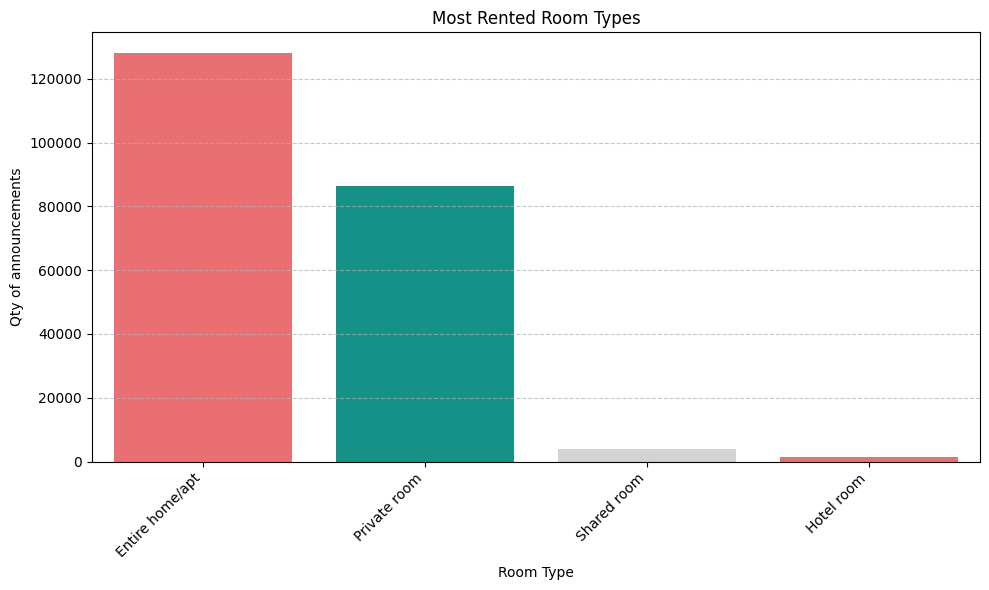

<Figure size 1400x800 with 0 Axes>

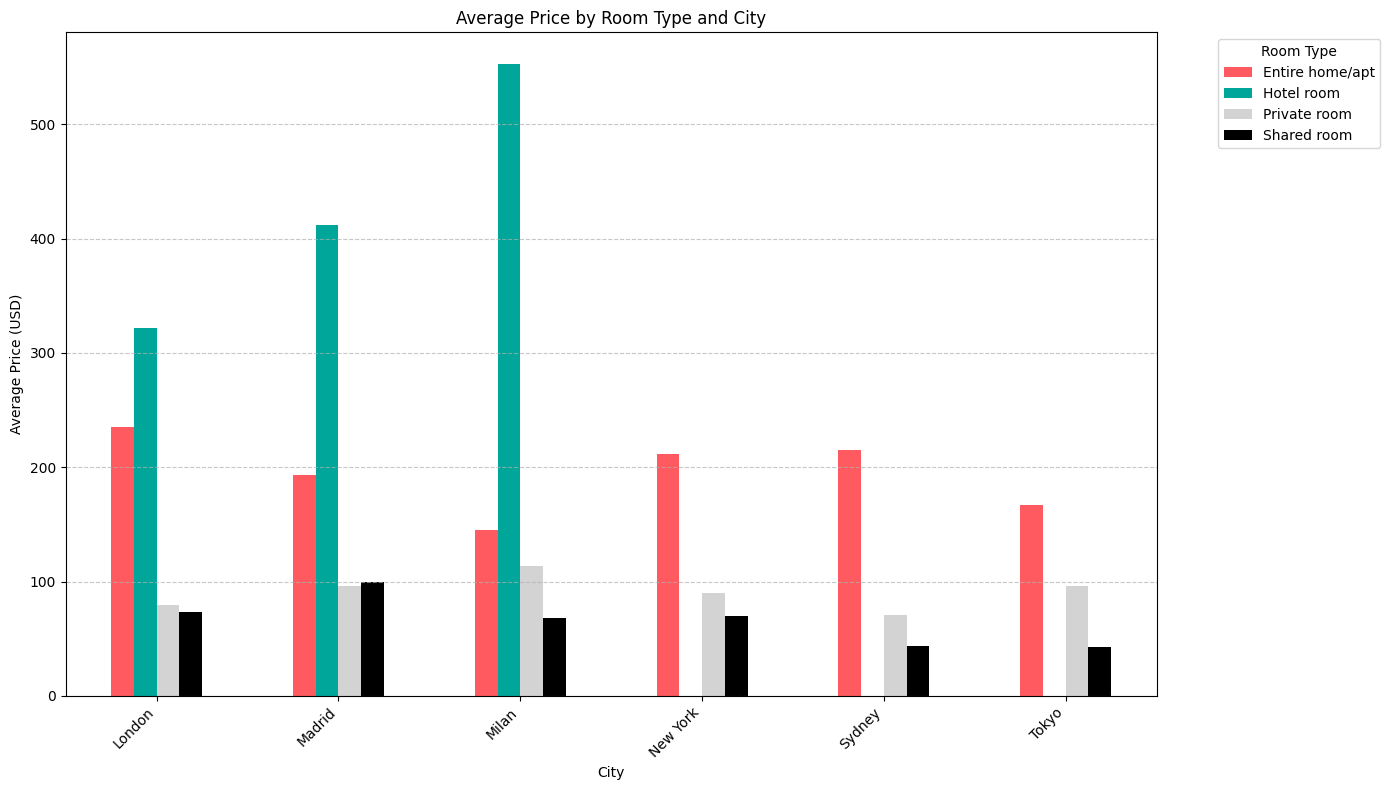

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['#ff5a5f'])
C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:66: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['#ff5a5f'])


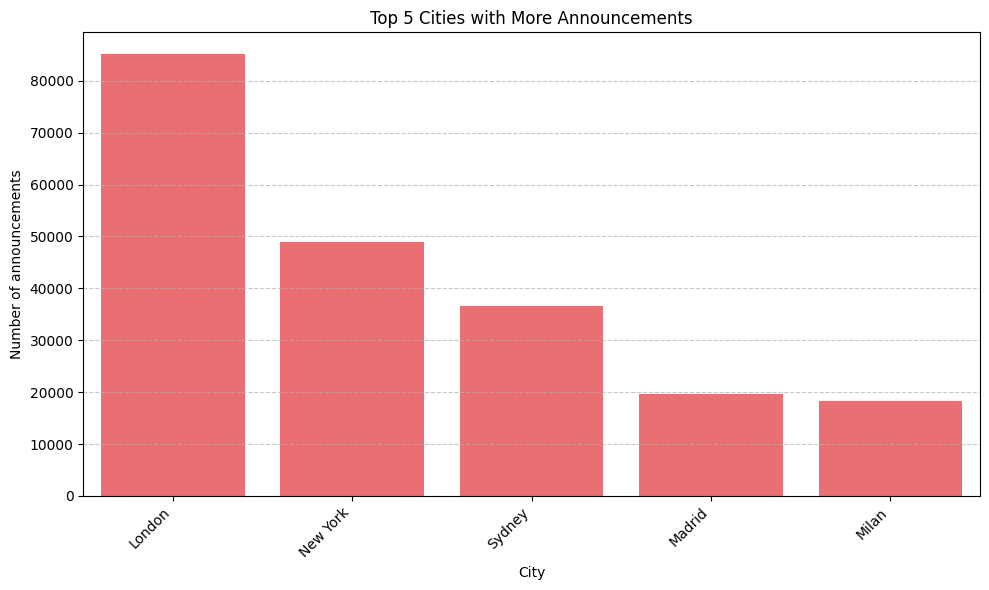

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_cities.index, y=bottom_5_cities.values, palette=['#ff5a5f'])
C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\2995229938.py:80: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=bottom_5_cities.index, y=bottom_5_cities.values, palette=['#ff5a5f'])


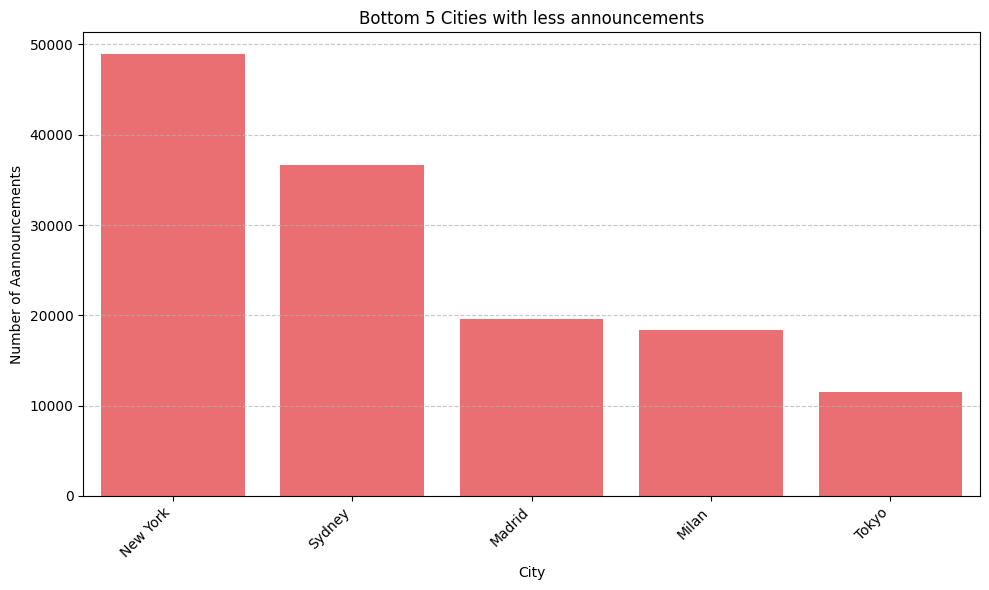

In [3]:
colors = ['#ff5a5f', '#FEFEFE', 'black', '#00a699', 'lightgray']
sns.set_palette(colors)

# Gráfico 1: Número de Anfitriones por Ciudad
hosts_per_city = df_clean_1.groupby('city')['host_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=hosts_per_city.index, y=hosts_per_city.values, palette=['#ff5a5f'])
plt.title('Numbers of Hosts per City', color='black')
plt.xlabel('City', color='black')
plt.ylabel('Number of Hosts', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 2: Número de Anfitriones Recurrentes por Ciudad
# Asumiendo que 'calculated_host_listings_count' indica la recurrencia o múltiples anuncios
recurrent_hosts_per_city = df_clean_1.groupby('city')['calculated_host_listings_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=recurrent_hosts_per_city.index, y=recurrent_hosts_per_city.values, palette=['#ff5a5f'])
plt.title('Number of Current Hosts per City', color='black')
plt.xlabel('City', color='black')
plt.ylabel('Number of Current Hosts', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 3: Tipos de Inmuebles Más Alquilados
room_type_counts = df_clean_1['room_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette=['#ff5a5f', '#00a699', 'lightgray'])
plt.title('Most Rented Room Types', color='black')
plt.xlabel('Room Type', color='black')
plt.ylabel('Qty of announcements', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 4: Precio Promedio por Tipo de Habitación y Ciudad
avg_price_room_type_city = df_clean_1.groupby(['city', 'room_type'])['price_USD'].mean().unstack()

plt.figure(figsize=(14, 8))
avg_price_room_type_city.plot(kind='bar', figsize=(14, 8), color=['#ff5a5f', '#00a699', 'lightgray', 'black'])
plt.title('Average Price by Room Type and City', color='black')
plt.xlabel('City', color='black')
plt.ylabel('Average Price (USD)', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 5: Top 5 Ciudades con Más Anuncios
top_5_cities = df_clean_1['city'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette=['#ff5a5f'])
plt.title('Top 5 Cities with More Announcements', color='black')
plt.xlabel('City', color='black')
plt.ylabel('Number of announcements', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 6: 5 Ciudades con Menos Anuncios
bottom_5_cities = df_clean_1['city'].value_counts().tail(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_cities.index, y=bottom_5_cities.values, palette=['#ff5a5f'])
plt.title('Bottom 5 Cities with less announcements', color='black')
plt.xlabel('City', color='black')
plt.ylabel('Number of Aannouncements', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. Host Type Distribution by Neighbourhood

This plot distinguishes between 'Single-listing Hosts' and 'Multi-listing Hosts' within different neighbourhood areas. This breakdown is crucial for understanding the market's professionalization versus casual renting, a key factor in urban policy discussions

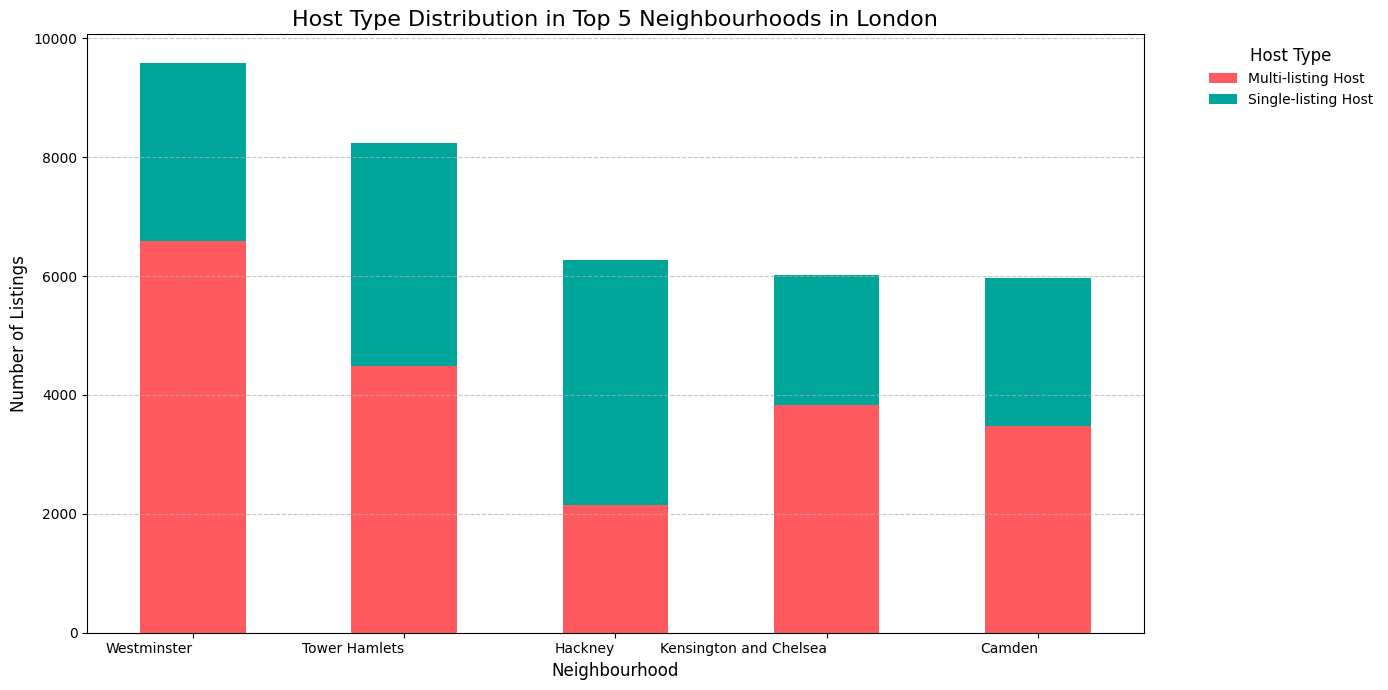

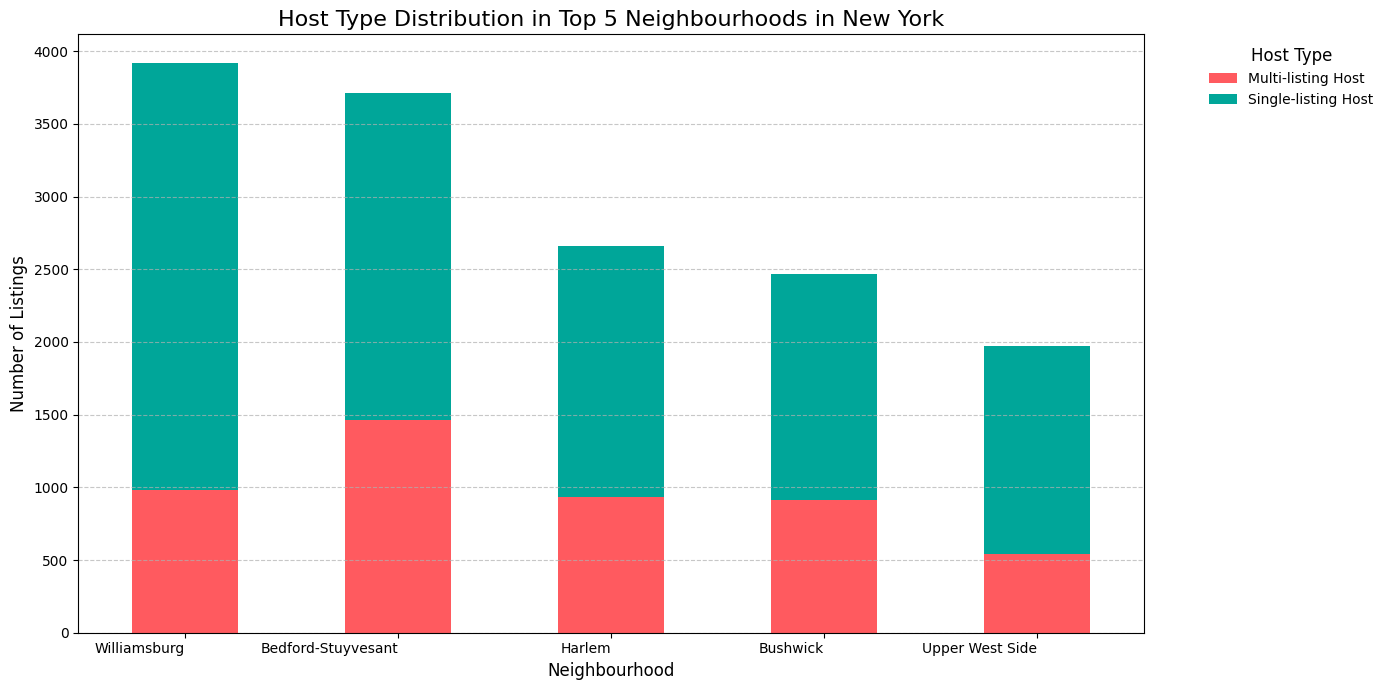

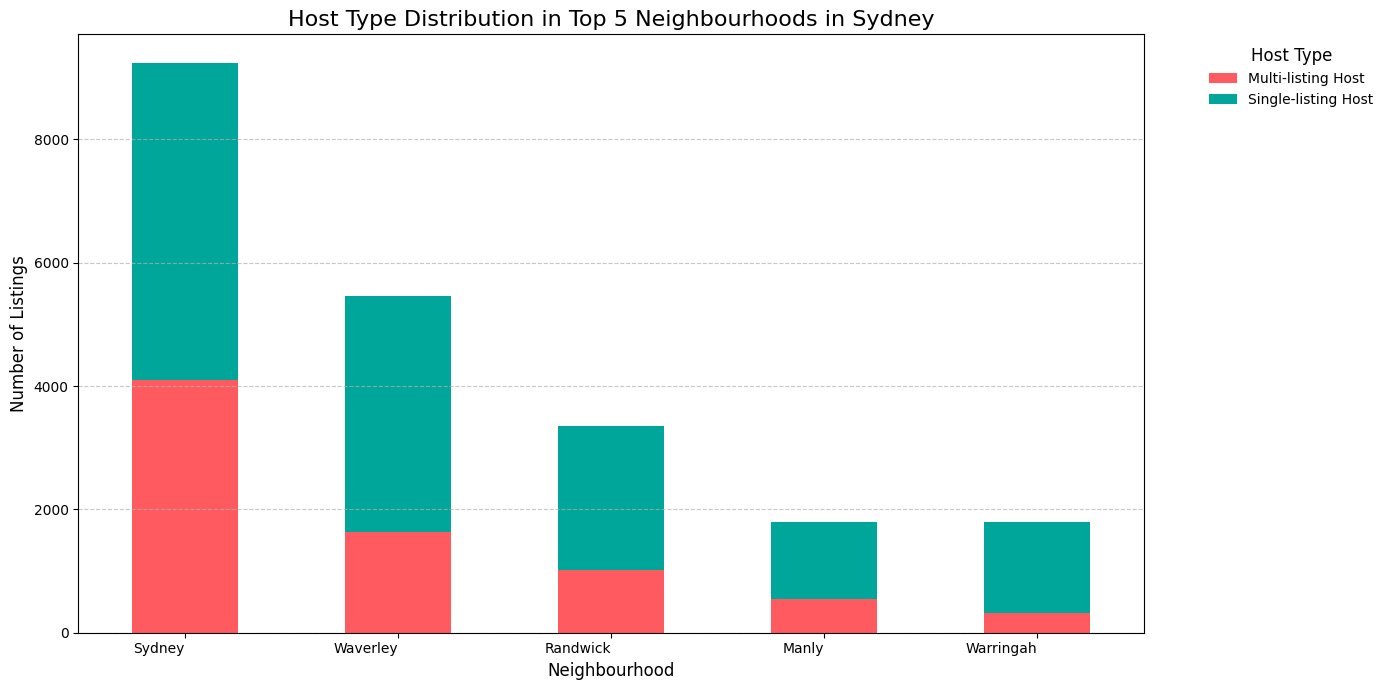

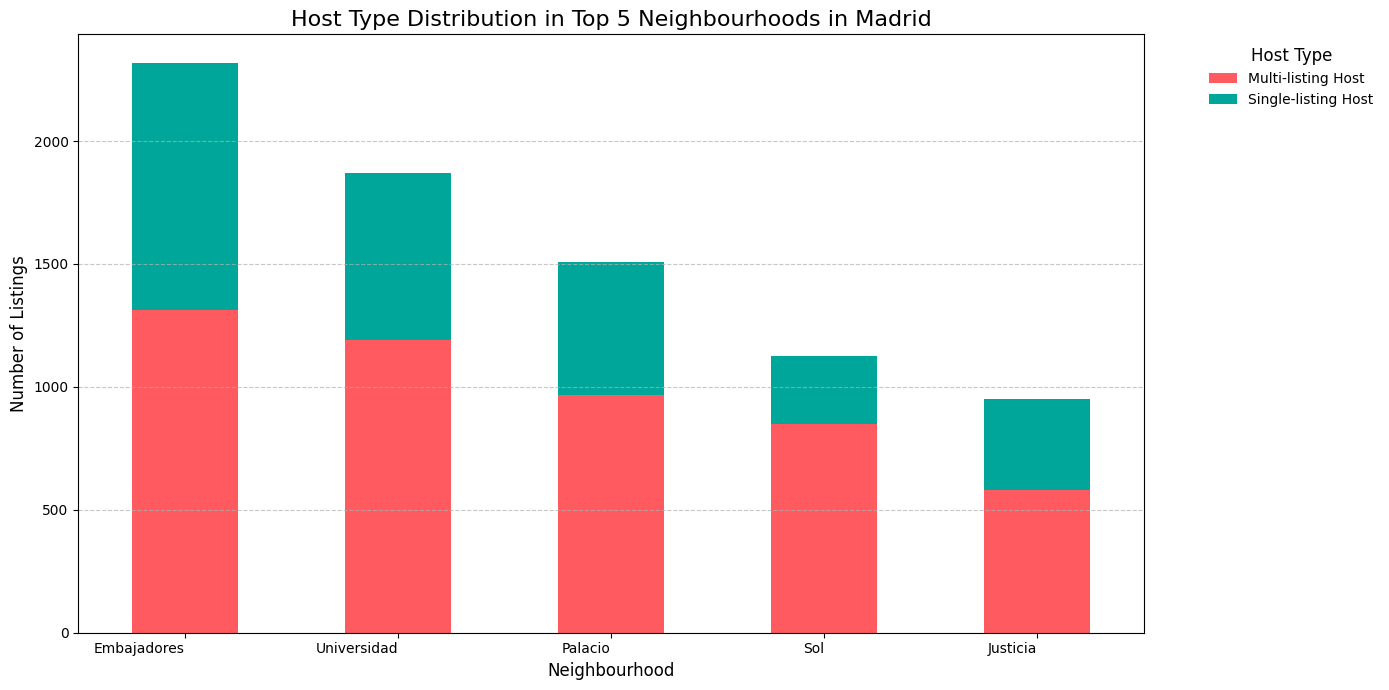

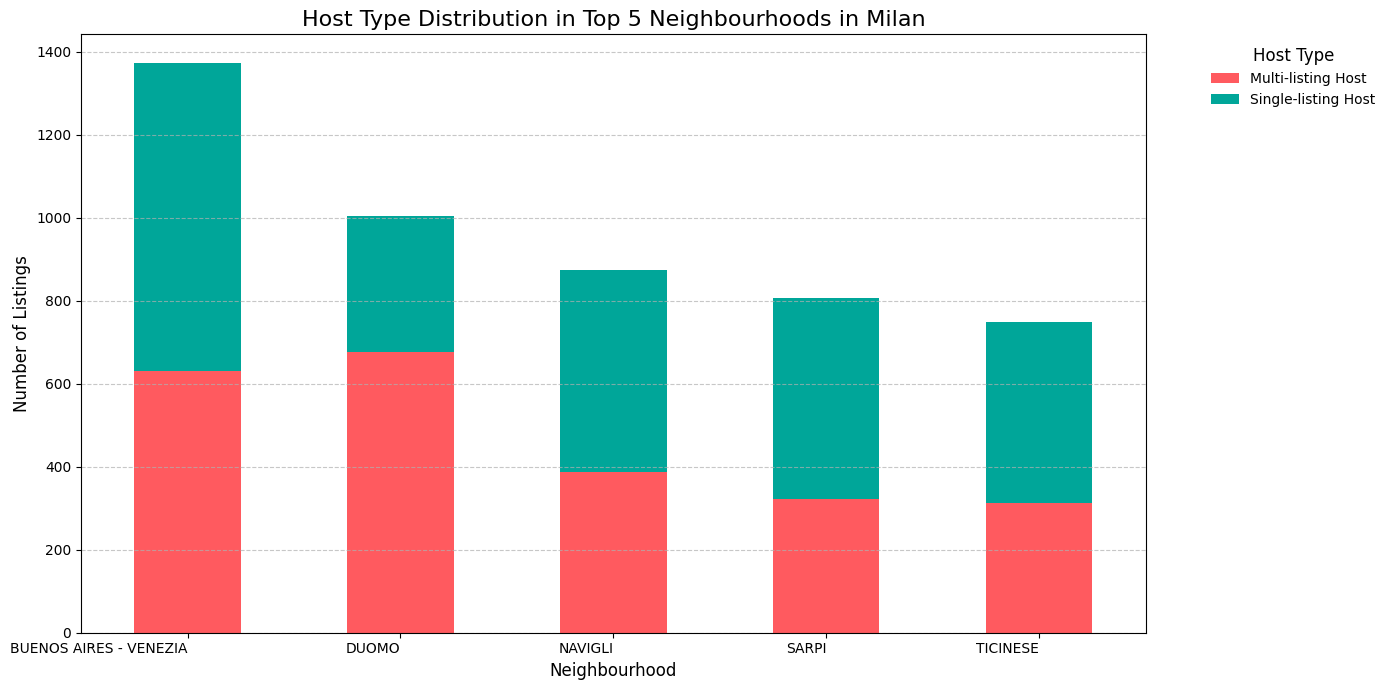

In [4]:
# Create 'host_type' column using .loc to avoid SettingWithCopyWarning if df_clean_1 itself is a slice
# A common practice is to create the column on the original DataFrame before filtering
df_clean_1.loc[:, 'host_type'] = df_clean_1['calculated_host_listings_count'].apply(
    lambda x: 'Multi-listing Host' if x > 1 else 'Single-listing Host'
)

# Filter out 'Unknown' neighbourhood and 'Unknown' city, creating a clean copy for analysis
filtered_df = df_clean_1[
    (df_clean_1['neighbourhood'] != 'Unknown') &
    (df_clean_1['city'] != 'Unknown')
].copy()

custom_palette_host_type = {
    'Multi-listing Host': '#ff5a5f',
    'Single-listing Host': '#00a699'
}

# Get the top cities by total listings to iterate through them
top_cities = filtered_df['city'].value_counts().head(5).index.tolist()

for city_name in top_cities:
    # Filter data for the current city
    city_df = filtered_df[filtered_df['city'] == city_name].copy()

    # Get top 5 neighbourhoods within this city
    top_neighbourhoods_in_city = city_df['neighbourhood'].value_counts().head(5).index

    # Filter data for only these top neighbourhoods
    city_neighbourhood_data = city_df[city_df['neighbourhood'].isin(top_neighbourhoods_in_city)]

    # Group by neighbourhood and host_type, then count listings
    host_type_distribution_city = city_neighbourhood_data.groupby(['neighbourhood', 'host_type']).size().unstack(fill_value=0)

    # Calculate total listings per neighbourhood to sort by
    total_listings_per_neighbourhood_city = host_type_distribution_city.sum(axis=1)

    # Sort the distribution for this city by total listings
    host_type_distribution_city_sorted = host_type_distribution_city.loc[
        total_listings_per_neighbourhood_city.sort_values(ascending=False).index
    ]

    plt.figure(figsize=(14, 7))
    host_type_distribution_city_sorted.plot(
        kind='bar',
        stacked=True,
        color=[custom_palette_host_type[col] for col in host_type_distribution_city_sorted.columns],
        ax=plt.gca()
    )
    plt.title(f'Host Type Distribution in Top 5 Neighbourhoods in {city_name}', color='black', fontsize=16)
    plt.xlabel('Neighbourhood', color='black', fontsize=12)
    plt.ylabel('Number of Listings', color='black', fontsize=12)
    plt.xticks(rotation=0, ha='right', color='black')
    plt.yticks(color='black')
    plt.legend(title='Host Type', title_fontsize='12', fontsize='10', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

2. Room Type Availability by City

This visualization shows the median availability_365 for each room_type across different city locations. This highlights which types of accommodations are most readily available, impacting both tourism flow and potential investor interest in specific property types.

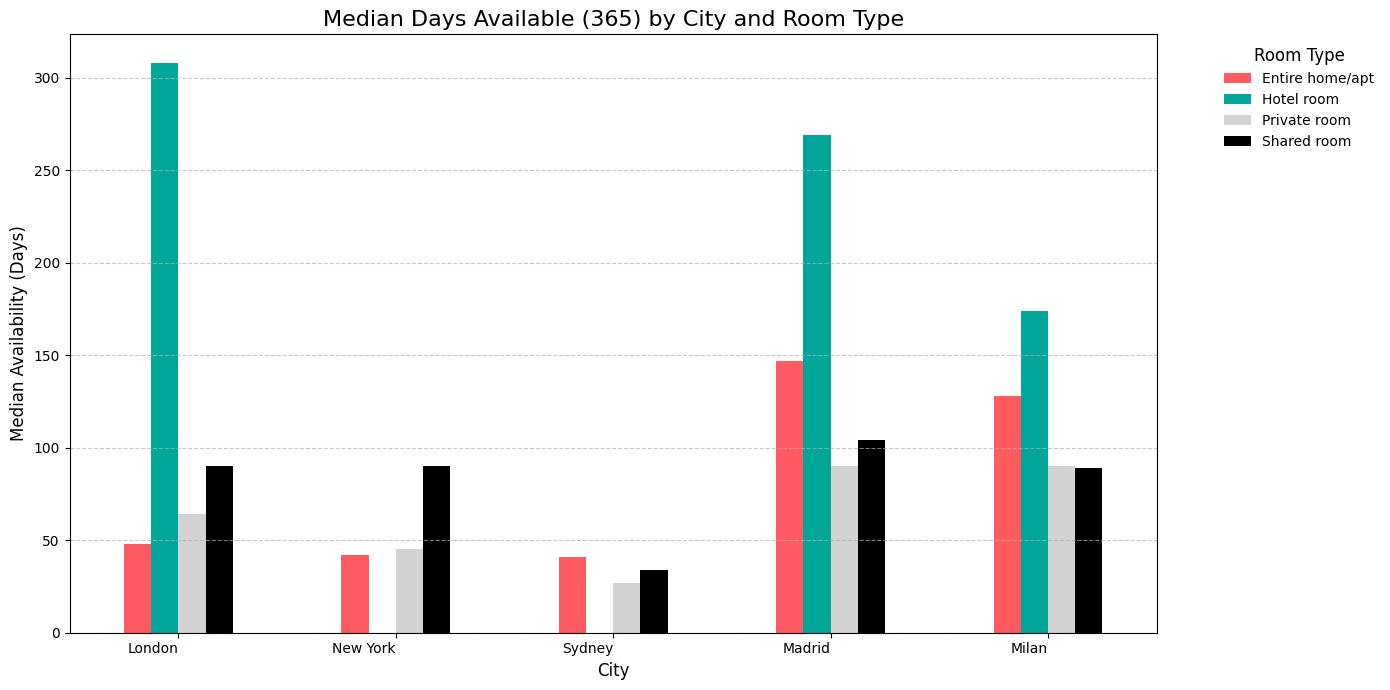

In [5]:
# Calculate median availability for each room_type per city
median_availability = df_clean_1.groupby(['city', 'room_type'])['availability_365'].median().unstack(fill_value=0)

# Select top N cities for better visualization
top_cities_avail = df_clean_1['city'].value_counts().head(5).index
median_availability_plot = median_availability.loc[top_cities_avail].copy()

# Ensure all room types in your data are covered with colors
room_types_in_data = median_availability_plot.columns.tolist()
room_type_colors = {}
color_options = ['#ff5a5f', '#00a699', 'lightgray', 'black']
for i, rt in enumerate(room_types_in_data):
    room_type_colors[rt] = color_options[i % len(color_options)]

plt.figure(figsize=(14, 7))
median_availability_plot.plot(kind='bar', ax=plt.gca(),
                              color=[room_type_colors.get(col, 'black') for col in median_availability_plot.columns])
plt.title('Median Days Available (365) by City and Room Type', color='black', fontsize=16)
plt.xlabel('City', color='black', fontsize=12)
plt.ylabel('Median Availability (Days)', color='black', fontsize=12)
plt.xticks(rotation=0, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title='Room Type', title_fontsize='12', fontsize='10', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Airbnb Listing Concentration (Latitude vs Longitude)

This heatmap visualizes the density of Airbnb listings using latitude and longitude coordinates. High-density areas indicate popular or saturated zones, which is vital information for local authorities considering regulations or infrastructure development in tourist-heavy areas.

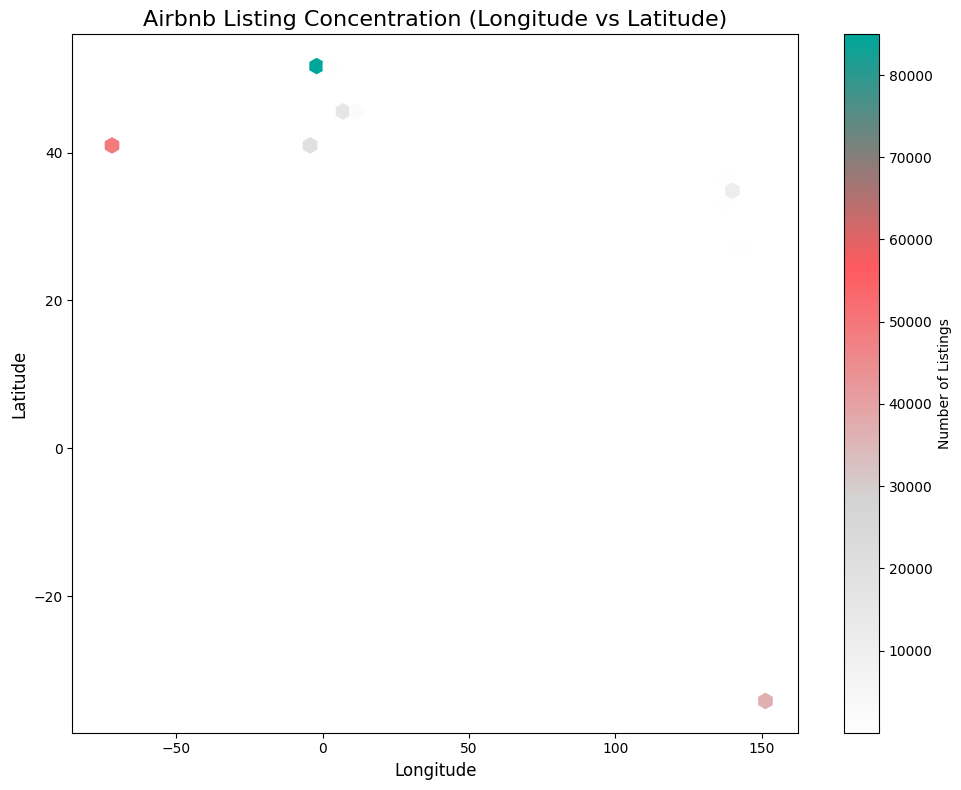

In [6]:
# Assuming df_clean_1 is loaded and has 'latitude' and 'longitude'.

# Define custom colors for the heatmap gradient
colors_for_geo_cmap = ['#FEFEFE', 'lightgray', '#ff5a5f', '#00a699']
custom_geo_cmap = LinearSegmentedColormap.from_list("custom_geo_cmap", colors_for_geo_cmap)

plt.figure(figsize=(10, 8))
plt.hexbin(df_clean_1['longitude'], df_clean_1['latitude'], gridsize=50, cmap=custom_geo_cmap, mincnt=1)
cb = plt.colorbar(label='Number of Listings')
cb.ax.yaxis.label.set_color('black')
cb.ax.tick_params(colors='black')

plt.title('Airbnb Listing Concentration (Longitude vs Latitude)', color='black', fontsize=16)
plt.xlabel('Longitude', color='black', fontsize=12)
plt.ylabel('Latitude', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

5. Review Activity Over Time (Monthly Trend)

This line plot visualizes the monthly trend of listing activity based on the last_review date. Changes in review frequency over time can be indicative of broader market shifts, impacts of new legislation, or economic cycles affecting tourism and short-term rentals.



In [8]:
df_clean_1['last_review'] = pd.to_datetime(df_clean_1['last_review'], errors='coerce')

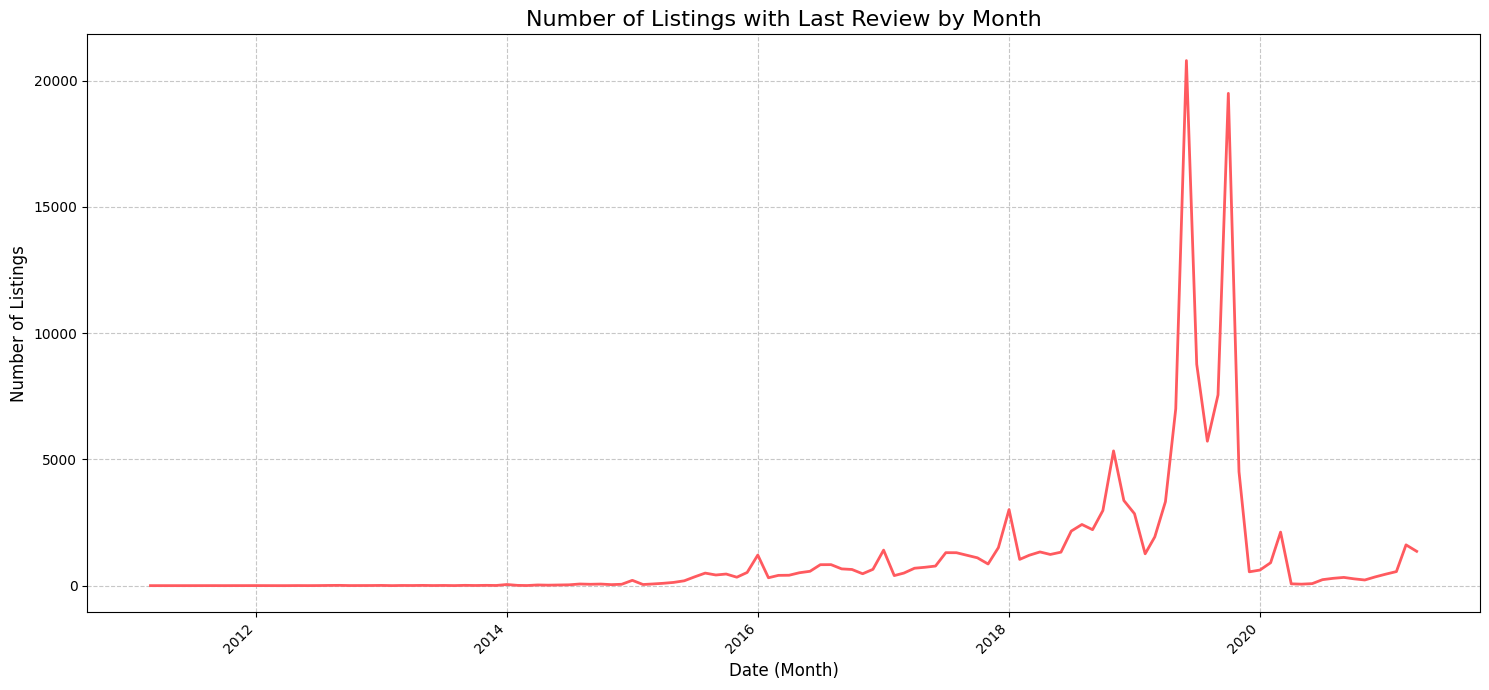

In [9]:
df_valid = df_clean_1[df_clean_1['last_review'] != pd.to_datetime('1900-01-01')].copy()
# Group by month and year of last_review to get a timeline of review activity
review_activity_timeline = df_valid.groupby(df_valid['last_review'].dt.to_period('M')).size()

# Convert PeriodIndex to datetime for plotting on a continuous x-axis
review_activity_timeline.index = review_activity_timeline.index.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(review_activity_timeline.index, review_activity_timeline.values, color='#ff5a5f', linewidth=2)
plt.title('Number of Listings with Last Review by Month', color='black', fontsize=16)
plt.xlabel('Date (Month)', color='black', fontsize=12)
plt.ylabel('Number of Listings', color='black', fontsize=12)
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


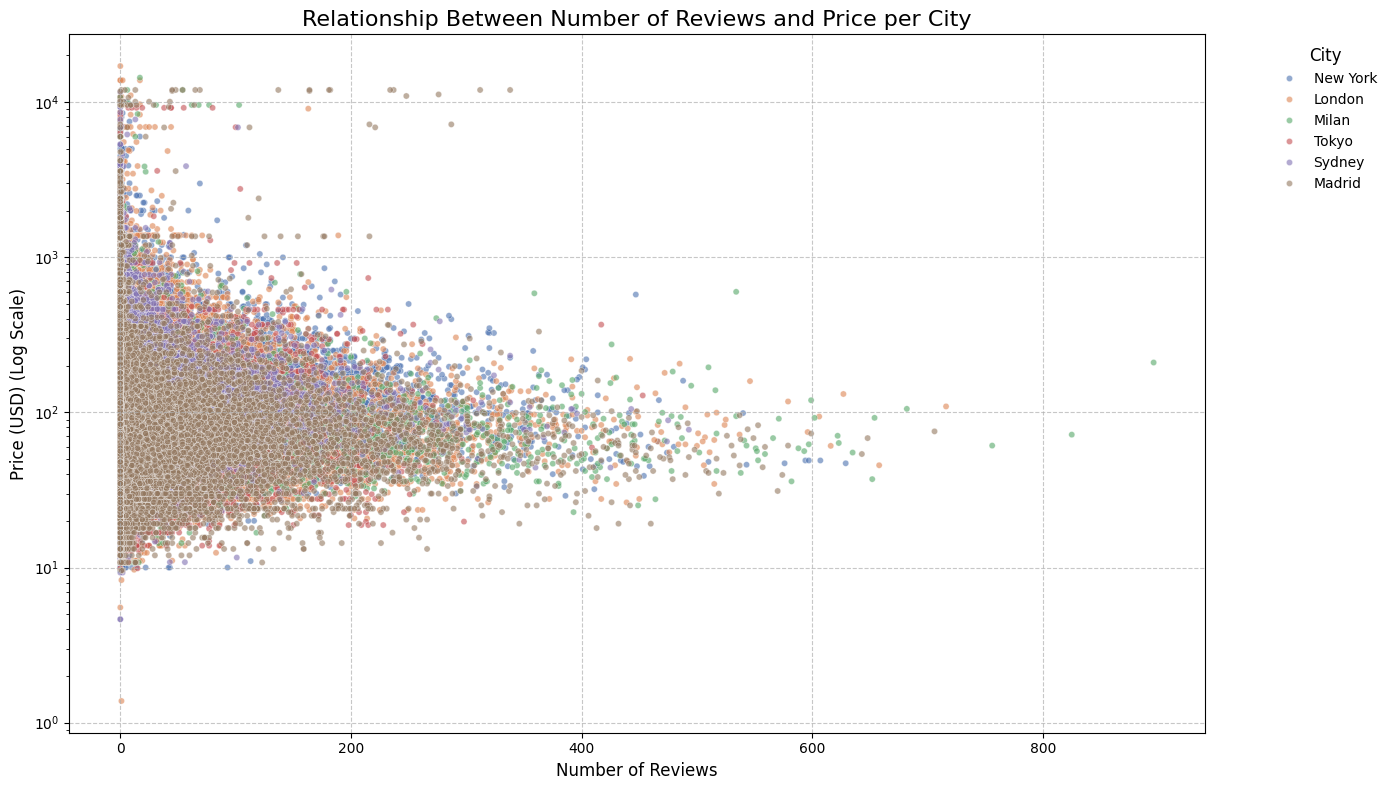

In [10]:
# Define your custom palette
custom_palette = ['#ff5a5f', '#00a699', 'lightgray', 'black', '#FEFEFE'] # Added white for background

# It's good practice to filter out extremely low or zero prices if they are data errors,
# as log(0) or log(negative) is undefined.
df_filtered_prices = df_clean_1[df_clean_1['price_USD'] > 0].copy()

plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=df_filtered_prices,
    x='number_of_reviews',
    y='price_USD',
    hue='city',
    palette='deep', # Using a standard seaborn palette to get distinct colors for many cities
    s=20, # marker size
    alpha=0.6 # Transparency to see overlapping points
)

plt.yscale('log') # Apply logarithmic scale to the y-axis (price)

plt.title('Relationship Between Number of Reviews and Price per City', color='black', fontsize=16)
plt.xlabel('Number of Reviews', color='black', fontsize=12)
plt.ylabel('Price (USD) (Log Scale)', color='black', fontsize=12)

plt.xticks(color='black')
plt.yticks(color='black')

plt.legend(title='City', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\160024622.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  listing_counts_by_review_tier_city = df_plot_data.groupby(['city', 'review_tier']).size().unstack(fill_value=0)


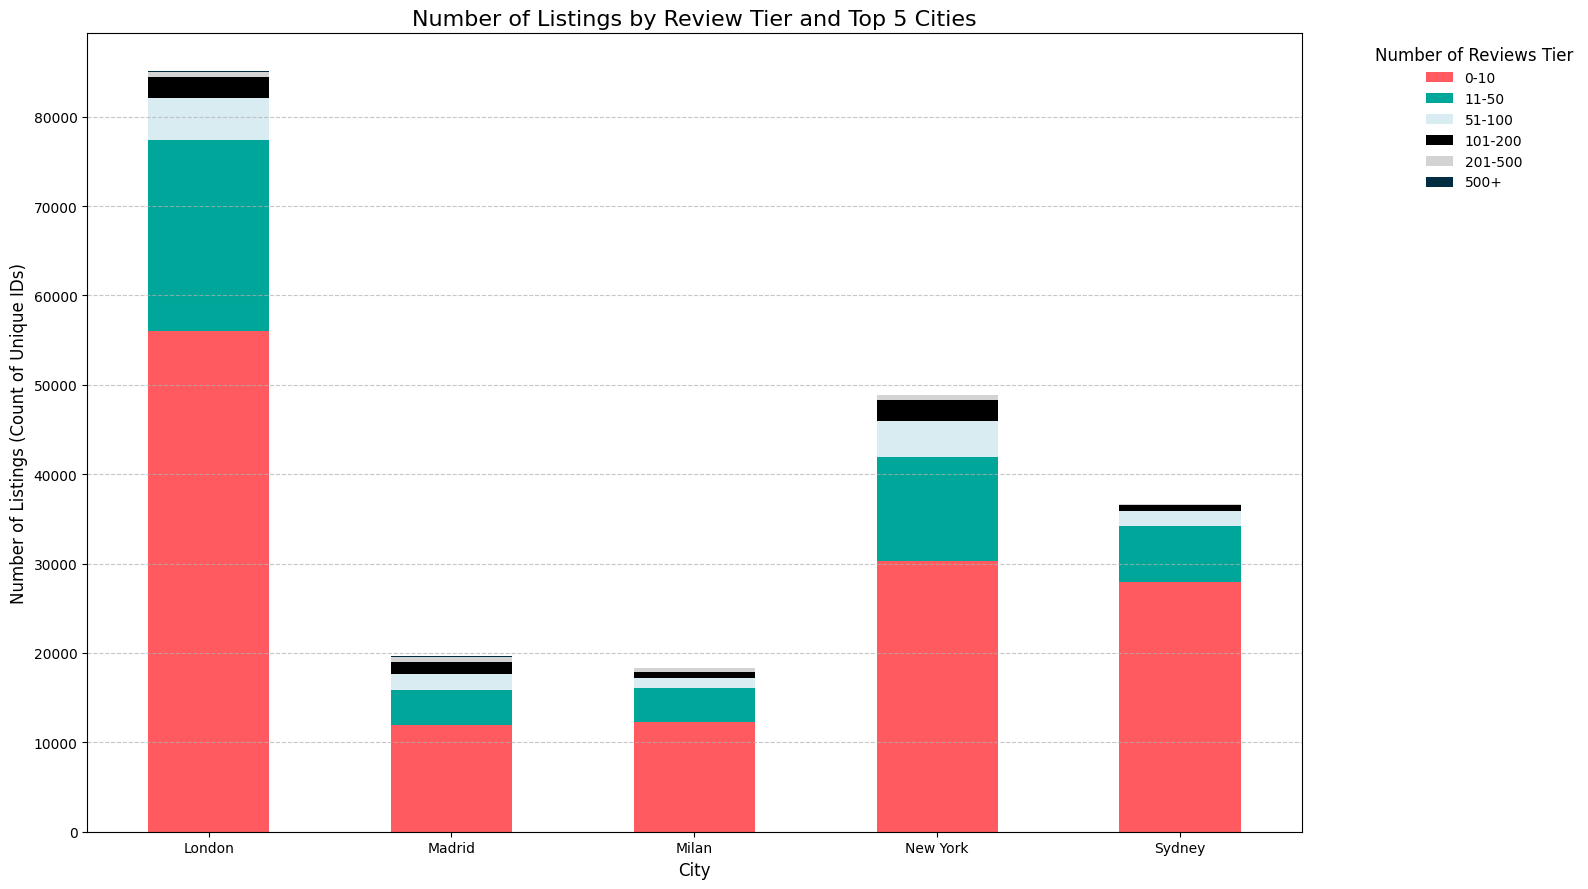

In [11]:
# Filter out 'Unknown' city if it exists and create a copy for safety
df_filtered_cities = df_clean_1[df_clean_1['city'] != 'Unknown'].copy()

# Define review tiers (bins) for 'number_of_reviews'
# These bins are designed to categorize listings by their review volume.
# Adjust these bins (e.g., [0, 5, 20, 100, 500, np.inf]) if the distribution of your 'number_of_reviews'
# suggests different meaningful ranges for your dataset.
bins = [0, 10, 50, 100, 200, 500, np.inf]
labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '500+']

# Assign listings to review tiers using pd.cut
df_filtered_cities.loc[:, 'review_tier'] = pd.cut(
    df_filtered_cities['number_of_reviews'],
    bins=bins,
    labels=labels,
    right=True, # Include the rightmost bin edge in each interval
    include_lowest=True # Include listings with 0 reviews in the first bin
)

# Drop any rows where 'review_tier' couldn't be assigned (e.g., if 'number_of_reviews' was NaN)
df_filtered_cities = df_filtered_cities.dropna(subset=['review_tier']).copy()

# Get the top 5 cities by their total number of listings for focused analysis
top_cities_for_reviews = df_filtered_cities['city'].value_counts().head(5).index.tolist()

# Filter the DataFrame to include only listings from these top cities
df_plot_data = df_filtered_cities[df_filtered_cities['city'].isin(top_cities_for_reviews)].copy()

# Count the number of unique listings (id_announcement) per review tier within each city.
# .size() correctly counts rows (listings) for each group.
listing_counts_by_review_tier_city = df_plot_data.groupby(['city', 'review_tier']).size().unstack(fill_value=0)

# Define a custom color palette for the review tiers
# This palette aims to show a progression, with your main pink highlighting certain tiers.
# Ensure enough distinct colors for your 'labels' (review tiers).
custom_palette_reviews = ['#ff5a5f', '#00a699', '#D9ECF2', 'black', 'lightgray', '#002D40'] # Example for 6 tiers

# --- Plotting ---
plt.figure(figsize=(16, 9)) # Adjust figure size for better readability

# Create a stacked bar chart: each city's bar is stacked with different review tiers
listing_counts_by_review_tier_city.plot(
    kind='bar',
    stacked=True,
    color=custom_palette_reviews[:len(listing_counts_by_review_tier_city.columns)], # Use only as many colors as there are tiers
    ax=plt.gca() # Use the current axes for plotting
)

plt.title('Number of Listings by Review Tier and Top 5 Cities', color='black', fontsize=16)
plt.xlabel('City', color='black', fontsize=12)
plt.ylabel('Number of Listings (Count of Unique IDs)', color='black', fontsize=12)
plt.xticks(rotation=0, ha='center', color='black') # Rotate x-axis labels for readability
plt.yticks(color='black')
plt.legend(title='Number of Reviews Tier', title_fontsize='12', fontsize='10', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left') # Legend outside the plot
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

 analyze the "cheap vs. expensive" listings and their profitability/management.

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\917169550.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


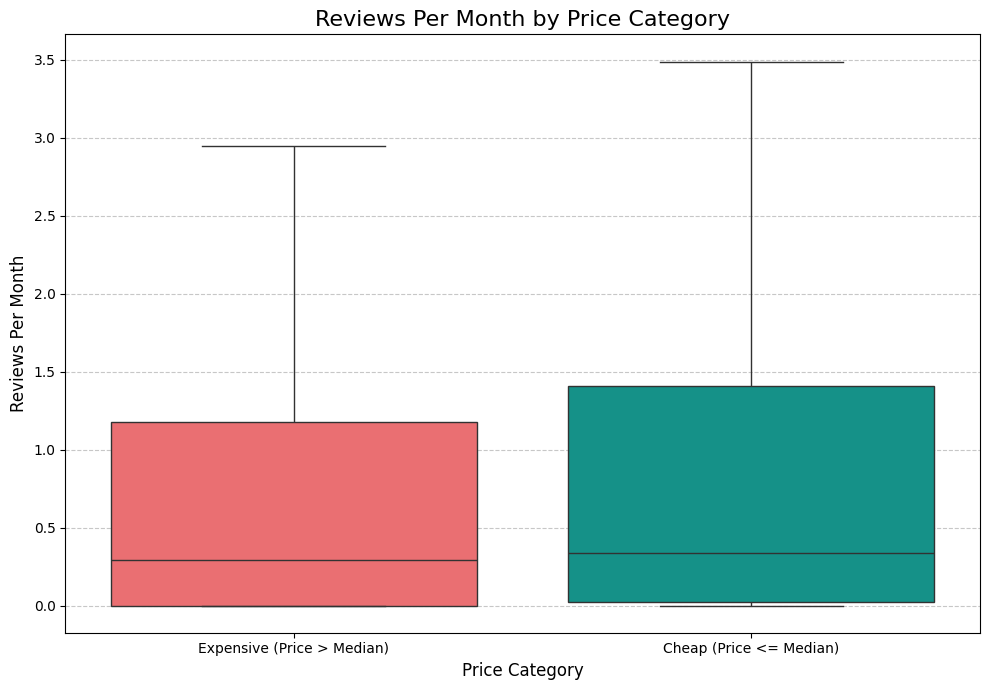

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\917169550.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


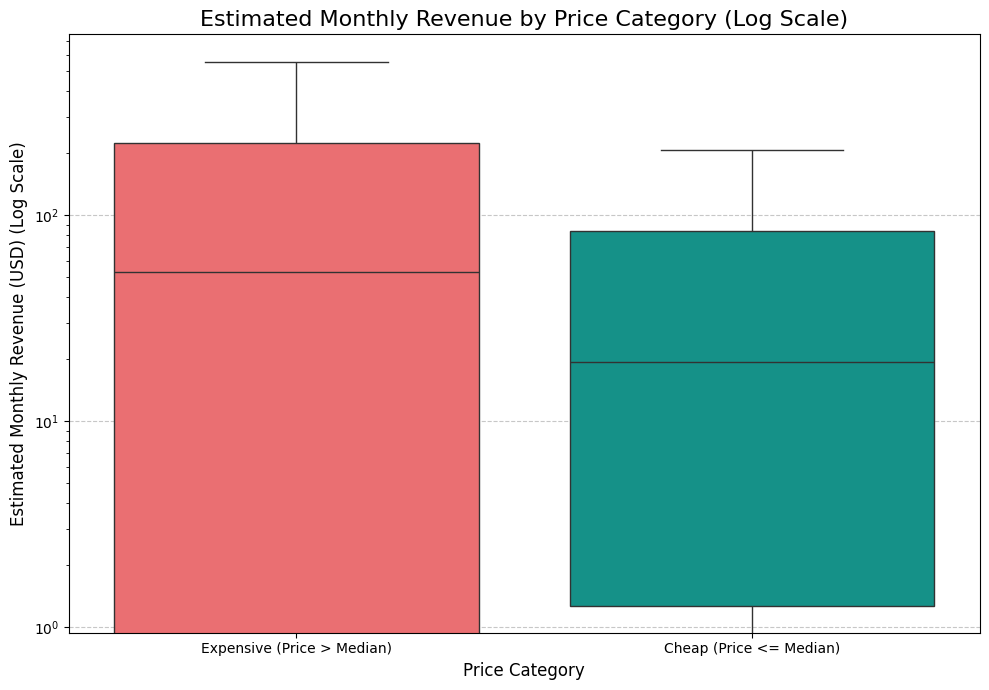

In [12]:

# --- Data Preparation ---
# Create a working copy to avoid modifying the original DataFrame
df_analysis = df_clean_1.copy()

# Filter out listings with price_USD <= 0 or NaN reviews_per_month.
# A NaN reviews_per_month usually means 0 reviews, which means no activity for this analysis.
df_analysis = df_analysis[
    (df_analysis['price_USD'] > 0) &
    (df_analysis['reviews_per_month'].notna())
].copy()

# Calculate Estimated Monthly Revenue (Proxy)
# This is a key metric for understanding profitability given available data
df_analysis.loc[:, 'estimated_monthly_revenue'] = df_analysis['price_USD'] * df_analysis['reviews_per_month']

# Define 'price_category' based on the median price
# This splits listings into roughly 'Cheap' and 'Expensive' groups
median_price = df_analysis['price_USD'].median()
df_analysis.loc[:, 'price_category'] = df_analysis['price_USD'].apply(
    lambda x: 'Cheap (Price <= Median)' if x <= median_price else 'Expensive (Price > Median)'
)

# --- Plotting ---
custom_palette_price_category = {
    'Cheap (Price <= Median)': '#00a699',
    'Expensive (Price > Median)': '#ff5a5f' # Your primary pink for emphasis
}

# --- Plot 1: Reviews Per Month vs. Price Category ---
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_analysis,
    x='price_category',
    y='reviews_per_month',
    palette=custom_palette_price_category,
    showfliers=False # Hide extreme outliers for cleaner visualization of the main distribution
)
plt.title('Reviews Per Month by Price Category', color='black', fontsize=16)
plt.xlabel('Price Category', color='black', fontsize=12)
plt.ylabel('Reviews Per Month', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Estimated Monthly Revenue vs. Price Category ---
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df_analysis,
    x='price_category',
    y='estimated_monthly_revenue',
    palette=custom_palette_price_category,
    showfliers=False # Hide extreme outliers for cleaner visualization
)
# Apply a log scale to the Y-axis (revenue) if its distribution is highly skewed,
# which is very likely given the price distribution.
plt.yscale('log')
plt.title('Estimated Monthly Revenue by Price Category (Log Scale)', color='black', fontsize=16)
plt.xlabel('Price Category', color='black', fontsize=12)
plt.ylabel('Estimated Monthly Revenue (USD) (Log Scale)', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribución del Número Mínimo de Estancias (Reviews)

Un histograma o un gráfico de barras (binned) es ideal para ver la distribución del number_of_reviews. Si la mayoría de los anuncios tienen pocas reseñas, significa que muchos anuncios tienen poca actividad. Si hay una cola larga de anuncios con muchas reseñas, indica que hay anuncios muy populares.




Interpretación:

Si tiene un pico alto cerca de 0 y una cola larga hacia la derecha, significa que la mayoría de los anuncios tienen muy pocas estancias (quizás son nuevos, o no muy populares), pero hay un pequeño porcentaje de anuncios que son extremadamente activos.
Contar Estancias Mínimas: "Este gráfico nos muestra que la mayoría de nuestros anuncios de Airbnb en el dataset tienen un número relativamente bajo de estancias confirmadas (basado en reseñas). Sin embargo, la larga cola hacia la derecha revela la existencia de 'super-anuncios' que han acumulado cientos, e incluso miles, de estancias exitosas, demostrando una popularidad excepcional y una gestión de alto volumen."

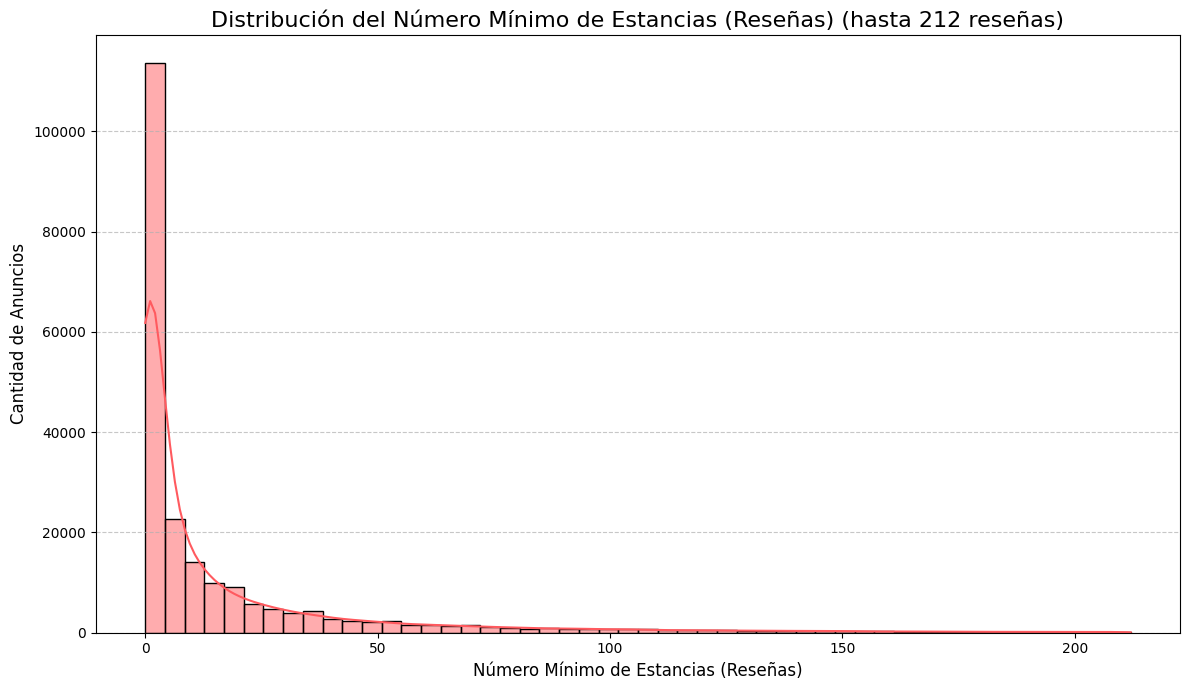

In [13]:
# --- Preparación de Datos ---
df_analysis = df_clean_1.copy()

# Filtrar por anuncios con 0 reseñas o reseñas faltantes si no queremos incluirlos en la 'actividad mínima'
# Si quieres incluir anuncios con 0 reseñas, puedes quitar este filtro o manejar los NaN de otra forma.
df_analysis = df_analysis[df_analysis['number_of_reviews'].notna()].copy()

# El número de reseñas es directamente el 'número mínimo de estancias'.
# Renombramos la columna para mayor claridad en el gráfico si es necesario, o la usamos directamente.
df_analysis.loc[:, 'min_stays_count'] = df_analysis['number_of_reviews']

# --- Graficado: Histograma/KDE del Número Mínimo de Estancias ---
plt.figure(figsize=(12, 7))

# Podemos usar un histograma para ver la distribución.
# Dado que 'number_of_reviews' puede tener una cola larga, es útil usar un log-scale en el eje X
# o limitar el rango para visualizar mejor la concentración de datos.
# Aquí, limitaremos a un cuantil alto (e.g., 99%) para evitar la dispersión excesiva por outliers.
reviews_upper_bound = df_analysis['min_stays_count'].quantile(0.99)
sns.histplot(
    df_analysis[df_analysis['min_stays_count'] <= reviews_upper_bound]['min_stays_count'],
    bins=50, # Número de "barras" en el histograma
    color='#ff5a5f', # Tu color principal
    edgecolor='black', # Bordes de las barras
    kde=True # Añadir una estimación de densidad del kernel para una curva suave
)

plt.title(f'Distribución del Número Mínimo de Estancias (Reseñas) (hasta {int(reviews_upper_bound)} reseñas)', color='black', fontsize=16)
plt.xlabel('Número Mínimo de Estancias (Reseñas)', color='black', fontsize=12)
plt.ylabel('Cantidad de Anuncios', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Para un storytelling más específico sobre cómo se distribuyen estas estancias por tipo de habitación/ciudad
# podemos usar boxplots o violín plots con el número de reseñas.
# (Esto ya lo vimos parcialmente en la sección anterior, pero se puede re-enfatizar)

**Ganancia Mínima por Reserva (price_USD * minimum_nights)**

Esta métrica nos da una idea del valor de cada reserva individual, sin importar la frecuencia. Un boxplot o violin plot comparando esta ganancia mínima por, por ejemplo, room_type o city, sería muy revelador.

- Value of Property Type: The type of property significantly impacts the minimum revenue per booking. 'Entire home/apt' allows hosts to earn substantially more per single reservation.
"Expensive vs. Cheap" Revisited: This plot reinforces the idea that higher-value properties (which typically aligns with 'Entire home/apt' and thus often higher price_USD) yield significantly more revenue per individual booking. This supports your 'con menos veces es rentable' (with fewer times it's profitable) hypothesis, especially when looking at the type of listing.


- Entry-Level/Low Activity: Most Airbnb listings are not highly active. They might be newer, less popular, or simply used occasionally by hosts. This represents the "long tail" of the market.
Super-Hosts / Popular Listings: A small fraction of listings are extremely popular and have a high volume of bookings. These are the "winners" or the most professionalized operations on the platform. This highlights the potential for high activity.
"Minimum Stays" Confirmed: It confirms that number_of_reviews is a valid proxy for the minimum number of times people have stayed at a place.

C:\Users\yaelp\AppData\Local\Temp\ipykernel_14660\3529297689.py:19: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


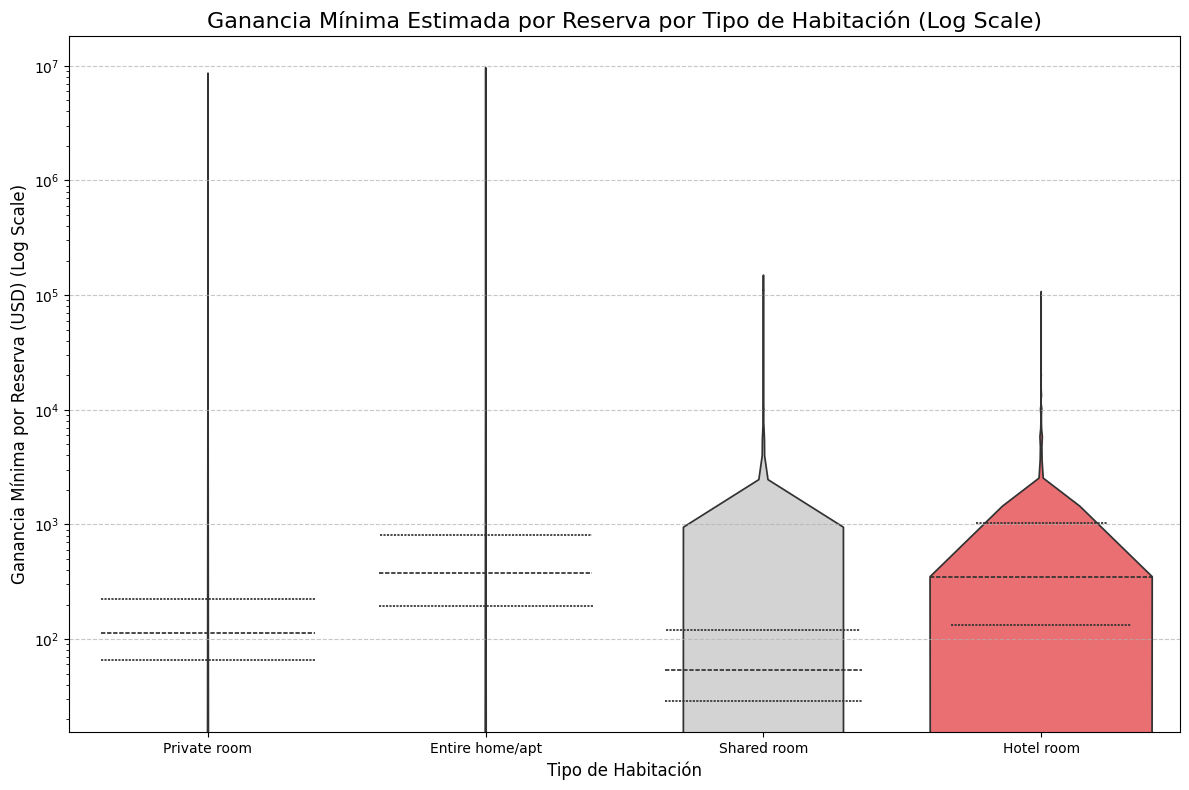

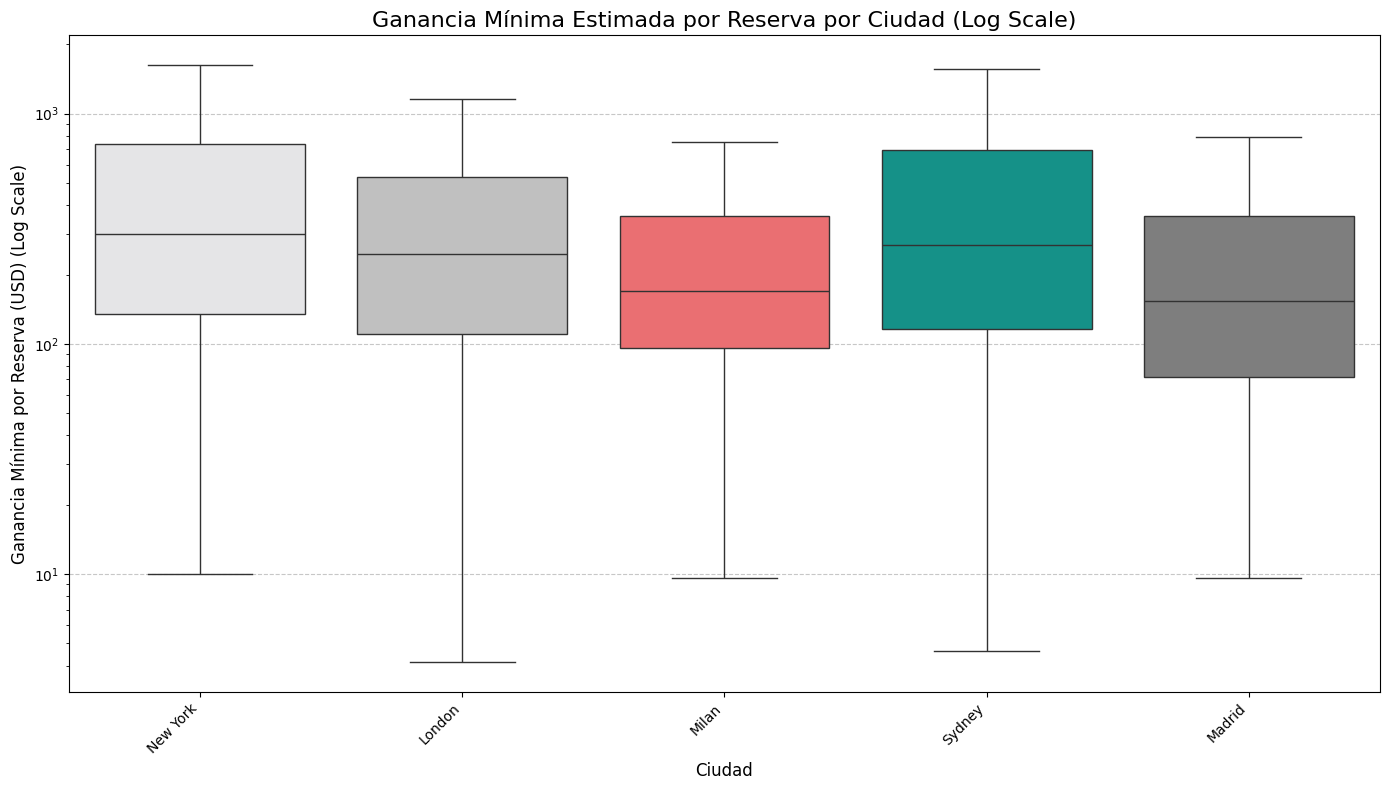

In [14]:
# --- Preparación de Datos ---
df_analysis = df_clean_1.copy()

# Asegurarse de que 'price_USD' y 'minimum_nights' sean válidos
df_analysis = df_analysis[
    (df_analysis['price_USD'] > 0) &
    (df_analysis['minimum_nights'] > 0) & # Las noches mínimas deben ser > 0 para calcular una ganancia
    (df_analysis['minimum_nights'].notna())
].copy()

# Calcular la ganancia mínima por reserva
df_analysis.loc[:, 'min_revenue_per_booking'] = df_analysis['price_USD'] * df_analysis['minimum_nights']

# --- Graficado: Distribución de la Ganancia Mínima por Reserva por Tipo de Habitación ---
# Usamos un violin plot para ver la densidad de la distribución además de los cuartiles.
# Es probable que 'min_revenue_per_booking' también sea muy asimétrica, por lo que un log-scale es útil.

plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_analysis,
    x='room_type',
    y='min_revenue_per_booking',
    palette=['#ff5a5f', '#00a699', 'lightgray'], # Colores para los tipos de habitación
    inner='quartile', # Mostrar cuartiles dentro del violín
    bw_adjust=0.5, # Ajustar el ancho de banda para ver más detalle en la distribución
    hue='room_type' # Asegurarse de que cada tipo de habitación tenga un color distinto
)

plt.yscale('log') # Escala logarítmica para el eje Y (ganancia)

plt.title('Ganancia Mínima Estimada por Reserva por Tipo de Habitación (Log Scale)', color='black', fontsize=16)
plt.xlabel('Tipo de Habitación', color='black', fontsize=12)
plt.ylabel('Ganancia Mínima por Reserva (USD) (Log Scale)', color='black', fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# --- Graficado Opcional: Ganancia Mínima por Reserva por Ciudad (Top 5) ---
# Si quieres ver esto por ciudad, similar a otros gráficos.
top_5_cities_revenue = df_analysis['city'].value_counts().head(5).index.tolist()
df_city_revenue_plot = df_analysis[df_analysis['city'].isin(top_5_cities_revenue)].copy()

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_city_revenue_plot,
    x='city',
    y='min_revenue_per_booking',
    palette=['#E5E5E7', '#C0C0C0', '#ff5a5f', '#00a699', '#7E7E7E'], # Usar una paleta de seaborn para distintas ciudades
    showfliers=False, # Ocultar outliers para mayor claridad
    hue='city' # Asegurarse de que cada ciudad tenga un color distinto
)

plt.yscale('log')
plt.title('Ganancia Mínima Estimada por Reserva por Ciudad (Log Scale)', color='black', fontsize=16)
plt.xlabel('Ciudad', color='black', fontsize=12)
plt.ylabel('Ganancia Mínima por Reserva (USD) (Log Scale)', color='black', fontsize=12)
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()